In [1]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 5.5 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/33/ee/e87d7a79a32f5ac833655ef29ebd37c7b389e8957bc71aacb10a95f822b9/matplotlib-3.8.0-cp311-cp311-macosx_10_12_x86_64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/8b/4f/be28a39cd5e988b8d3c2cc642c2c7ffeeb28fe80a86df71b6d1e473c5038/contourpy-1.1.1-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/89/17/a8c8e905a618302f4bd702a9a91910a36edd5b0ece7dd63e2e6c23641d76/fonttools-4.43.1-cp311-cp311-macosx_10_9_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [3]:
pd.__version__

'2.1.1'

In [4]:
np.__version__

'1.26.1'

# Object
- 출생율 데이터를 사용해서 `판다스 인 액션`에서 학습한 내용을 복습 및 연습

# Goal
- `Melt`에 대한 이해 및 사용법
  - pivot은 차후에 몇가지 연습
- 간단한 필터링
- 컬럼 기반 내용 추출
- 컬럼 추가 및 변경


In [5]:
#!wget https://raw.githubusercontent.com/sigmadream/practice-pandas/main/lab/data/20231019163232.csv
df = pd.read_csv("data/20231019163232.csv", encoding="cp949")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Columns: 937 entries, 시군구별 to 2022.12.2
dtypes: object(937)
memory usage: 139.2+ KB


In [7]:
df.head(2)

,시군구별,1997.01,1997.01.1,1997.01.2,1997.02,1997.02.1,1997.02.2,1997.03,1997.03.1,1997.03.2,...,2022.09.2,2022.10,2022.10.1,2022.10.2,2022.11,2022.11.1,2022.11.2,2022.12,2022.12.1,2022.12.2
0,시군구별,계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),...,여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명)
1,전국,63268,33266,30002,58144,30086,28058,62160,32333,29827,...,10715,20646,10530,10116,18981,9737,9244,16896,8684,8212


In [8]:
df_melt = df.melt(id_vars = "시군구별")

In [9]:
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17784 entries, 0 to 17783
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시군구별      17784 non-null  object
 1   variable  17784 non-null  object
 2   value     17784 non-null  object
dtypes: object(3)
memory usage: 416.9+ KB


In [10]:
df_melt["시군구별"].unique()

array(['시군구별', '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [11]:
df_melt = df_melt[df_melt["시군구별"] != "시군구별"]

In [12]:
df_melt["시군구별"].unique()

array(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [13]:
df_melt.head()

,시군구별,variable,value
1,전국,1997.01,63268
2,서울특별시,1997.01,13205
3,부산광역시,1997.01,4201
4,대구광역시,1997.01,3345
5,인천광역시,1997.01,3646


In [14]:
df_melt["연도"] = df_melt["variable"].str.split(".", expand=True)[0]
df_melt["월"] = df_melt["variable"].str.split(".", expand=True)[1]
df_melt["성별"] = df_melt["variable"].str.split(".", expand=True)[2]

In [15]:
df_melt["성별"] = df_melt["성별"].fillna("전체")
df_melt["성별"] = df_melt["성별"].replace("1", "남자").replace("2", "여자")

In [16]:
df_melt["성별"].unique()

array(['전체', '남자', '여자'], dtype=object)

In [17]:
df_melt = df_melt.rename(columns={"variable": "기간", "value": "출생아수"})

In [18]:
df_melt["출생아수"] = df_melt["출생아수"].replace("-", np.nan).astype(float)
df_melt["출생아수"]

1        63268.0
2        13205.0
3         4201.0
4         3345.0
5         3646.0
          ...   
17779      229.0
17780      250.0
17781      366.0
17782      503.0
17783      121.0
Name: 출생아수, Length: 16848, dtype: float64

In [19]:
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16848 entries, 1 to 17783
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구별    16848 non-null  object 
 1   기간      16848 non-null  object 
 2   출생아수    16308 non-null  float64
 3   연도      16848 non-null  object 
 4   월       16848 non-null  object 
 5   성별      16848 non-null  object 
dtypes: float64(1), object(5)
memory usage: 921.4+ KB


In [20]:
df_all = df_melt[(df_melt["시군구별"] == "전국") & (df_melt["성별"] == "전체")]

In [21]:
df_all = df_all.pivot_table(index="연도", aggfunc="sum")

<Axes: xlabel='연도'>

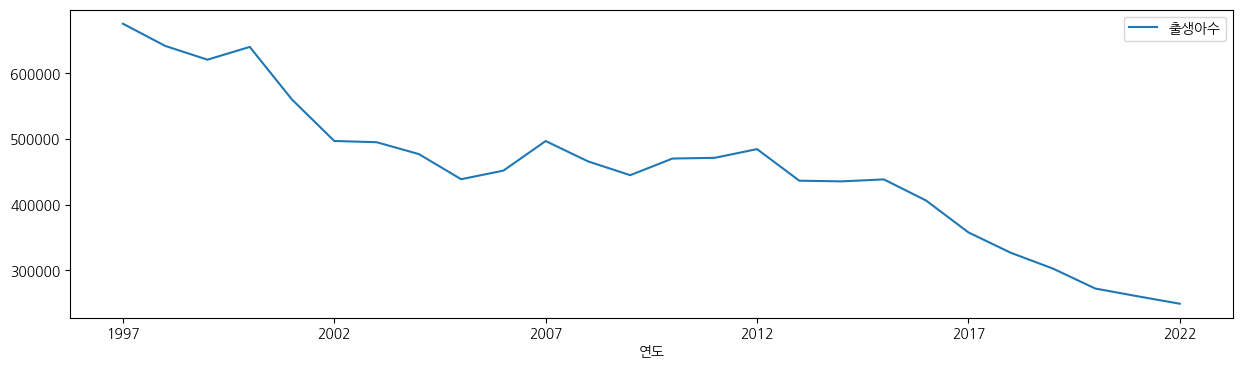

In [22]:
df_all.plot(figsize=(15,4))